In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [3]:
a = np.zeros((5,10))
a[3,9] = 1
a[3][2] = 1
a[2,[1,2,3,4]] = 1
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 중복되는 단어는 하나로 처리되기 때문에 x_train의 개수가 더 적은것을 확인 가능

In [4]:
len(train_data[0])

218

In [5]:
from collections import Counter
Counter(x_train[0])

Counter({0.0: 9880, 1.0: 120})

In [6]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 6s 417us/step - loss: 0.5055 - acc: 0.7687 - val_loss: 0.3594 - val_acc: 0.8671
Epoch 2/3
15000/15000 [==============================] - 4s 264us/step - loss: 0.2752 - acc: 0.9037 - val_loss: 0.2863 - val_acc: 0.8883
Epoch 3/3
15000/15000 [==============================] - 4s 277us/step - loss: 0.1994 - acc: 0.9299 - val_loss: 0.2834 - val_acc: 0.8856


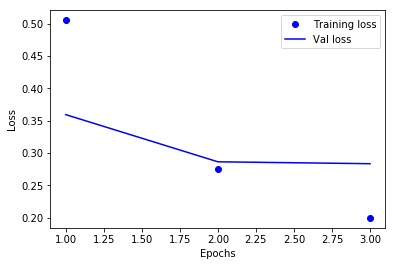

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs=range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 5s 213us/step


[0.30665043419361115, 0.87492]